# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
import numpy as np

def f(x):
    z = (x**2) * np.sin(x)
    return z

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
import numpy as np

def g(x):
    y = (2*x*np.sin(x))+((2-(x**2))*np.cos(x))-2
    return y

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
import numpy as np

def integrate_analytic(xmin, xmax):
    k = g(xmax)-g(xmin)
    return k

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [12]:
import numpy as np

def integrate_numeric(xmin, xmax, N):
    h = (xmax-xmin)/N
    x1 = xmin
    x2 = xmin + (h/2)
    x3 = xmin + h
    summation = 0
    for i in range(0, N):
        summation = f(x1) + (4*f(x2)) + f(x3) + summation
        x1 = x1 + h
        x2 = x2 + h
        x3 = x3 + h
    numeric = (h/6) * summation
    return numeric

Make sure you have implemented Simpson's rule correctly:

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


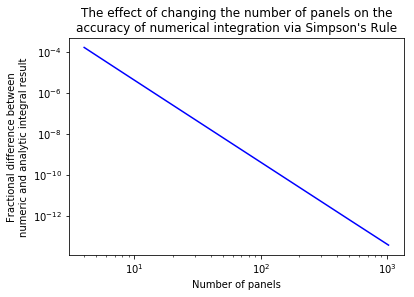

In [16]:
import numpy as np

x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_numeric = []
for i in range (0, 9):
    item = integrate_numeric(x0, x1, np.array(panel_counts[i]))
    result_numeric.append(item)


fractional_error = (result_analytic - result_numeric)/result_analytic



plt.xlabel('Number of panels')
plt.ylabel('Fractional difference between\nnumeric and analytic integral result')
plt.title('The effect of changing the number of panels on the\naccuracy of numerical integration via Simpson\'s Rule')

plt.xscale('log')
plt.yscale('log')

plt.plot(panel_counts, fractional_error, 'blue')

plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general, increasing the number of panels increases the accuracy of the numerical method (for Simpson's rule, the error scales as $N^-$$^4$).  This is because the definition of an integral uses the idea of a mathematical limit that tends to zero.

Numerical precision effects come into play.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Similar trend but slope is less steep, meaning trapezium rule is less accurate (when compared to using Simpson's Rule).